In [1]:
import os
import operator
import astropy
import pandas as pd
from pandas import DataFrame
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import astropy.table 
from astropy.table import Table , Column
import astropy.table.groups
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [2]:
hdul = fits.open('grizli_v2.1.fits')
#hdul.info()
hdr = hdul[1].header
data = hdul[1].data

#objectid is object ID, 5 digit number
#pab is Paschen Beta Flux
#paberr is error in Paschen Beta  Flux
objectid = data['ID']
pab = data['PAB_FLUX']
paberr = data['PAB_FLUX_ERR']

#print(hdr)
#print(pab)
#print(paberr)
#print(objectid)
#print(len(pab))
#print(len(paberr))
#print(len(objectid))

In [3]:
display(hdr)

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  571 / length of dimension 1                          
NAXIS2  =                 7434 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   73 / number of table fields                         
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
COMMENT                                                                         
COMMENT  *** Column names **

In [3]:
pab = data['PAB_FLUX'] > 0
hdul[1].data = data[pab]
#hdul.writeto('pabdata2.fits')

In [4]:
hdulpab = fits.open('pabdata2.fits')
hdulpabdata = hdulpab[1].data
hdulpabhdr = hdulpab[1].header
pabzcut = (12820 * (1 + hdulpabdata['Z_50'])) < 17000
hdulpab[1].data = hdulpabdata[pabzcut]
#hdulpab.writeto('pabdatazcut.fits')

#There are 437 objects with PaB flux data
#hdulpabhdr

pabdatazcut = fits.open('pabdatazcut.fits')
pabdatazcut.info()

Filename: pabdatazcut.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    163   403R x 73C   [3A, J, D, D, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [5]:
#Sorted by descending Paschen Beta flux
sortedpab = sorted(pabdatazcut[1].data , key = lambda data: data['PAB_FLUX'] , reverse = True )
#print(sortedpab['Z_50'])

#for i in sortedpab:
#    print(i['Z_50'])

fracerr = []
for i in sortedpab:
     fracerr.append(((i['Z_84'] - i['Z_50']) + (i['Z_50'] - i['Z_16']))/(2*(i['Z_50'])))

#print(fracerr)
#((sortedpab[i]['Z_84'] - sortedpab[i]['Z_50']) + (sortedpab[i]['Z_50'] - sortedpab[i]['Z_16']))/(2*(sortedpab[i]['Z_50'])

In [6]:
#Prints index, field, id, z50, redshift fractional error, observed frame PaB line, PaB flux, flux error
#Sorted by PaB flux

for i in range(0 , 20):
    print(i , sortedpab[i]['FIELD'] , sortedpab[i]['ID'] , round(sortedpab[i]['Z_50'] , 5) , round(fracerr[i] , 5) , round((12820 * (1 + sortedpab[i]['Z_50'])) , 0) , round(sortedpab[i]['PAB_FLUX'] , 2) , round(sortedpab[i]['PAB_FLUX_ERR'], 0))

0 GN2 19651 0.3208 0.00124 16933.0 1020.74 228.0
1 GN3 26823 0.29803 0.00408 16641.0 240.29 64.0
2 GN4 26823 0.298 0.00409 16640.0 238.02 64.0
3 GS4 19146 0.21192 0.00474 15537.0 218.86 17.0
4 GN3 28121 0.0338 0.00869 13253.0 201.45 1.0
5 GN4 28121 0.0338 0.0087 13253.0 201.37 1.0
6 GN1 38114 0.21648 0.03507 15595.0 116.1 2.0
7 GN2 16267 0.3229 0.0075 16960.0 96.1 29.0
8 GN4 22285 0.30027 0.00335 16669.0 87.93 30.0
9 GN3 34456 0.22432 0.01011 15696.0 85.42 3.0
10 GS3 40131 0.23936 0.03358 15889.0 79.05 10.0
11 GN7 9116 0.07617 0.06829 13797.0 56.03 7.0
12 GN3 33015 0.20252 0.00146 15416.0 53.31 2.0
13 GN2 21582 0.31991 0.0107 16921.0 47.34 14.0
14 GS3 42866 0.00869 0.004 12931.0 42.12 2.0
15 GN3 35356 0.27615 0.11415 16360.0 37.96 16.0
16 GN4 22761 0.2989 0.00632 16652.0 35.92 3.0
17 GS3 35547 0.26964 0.13364 16277.0 35.68 6.0
18 GS3 37739 0.00841 0.00408 12928.0 32.84 2.0
19 GS4 21890 0.15035 0.01416 14747.0 32.1 11.0


# 1D spectra for top 20 PaB fluxes

In [14]:
#Here I am picking the object with the brightest PaB flux and plotting its 1D spectrum
grism1D37717 = fits.open('GN1_37717.1D.fits')
#grism1D37717[2].header
#Plot flux vs wavelength

#grism1D37717[1].data

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   48 / length of dimension 1                          
NAXIS2  =                  181 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    6 / number of table fields                         
TTYPE1  = 'wave    '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'Angstrom'                                                            
TTYPE2  = 'flux    '                                                            
TFORM2  = 'D       '        

In [32]:
for wave, flux, err, flat, line, cont in grism1D37717[1].data:
    print("flux: {1:.2f}\n wave: {0}".format(flux, wave))
    #print("flux: " + flux)
    
    #if grism1D37717[1].data[i]['flux'] == 0:
    #    grism1D37717[1].data[i]['flux'] = np.nan
    break

flux: 10600.00
 wave: 0.0


In [35]:
for obj in grism1D37717[1].data:
    print(type(obj))
    break

<class 'astropy.io.fits.fitsrec.FITS_record'>


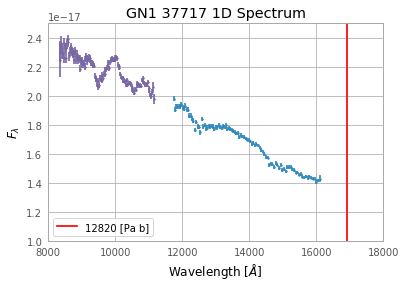

In [19]:
grism1D37717 = fits.open('GN1_37717.1D.fits')

#g141 variable definitions
x1d37717g141 = grism1D37717[1].data['wave']

y1d37717fluxg141 = grism1D37717[1].data['flux']
y1d37717fluxg141[y1d37717fluxg141 == 0] = np.nan

y1d37717flatg141 = grism1D37717[1].data['flat'] 
y1d37717flatg141[y1d37717flatg141 == 0] = np.nan
      
y1d37717fluxerrg141 = grism1D37717[1].data['err'] 
y1d37717fluxerrg141[y1d37717fluxerrg141 == 0] = np.nan

y1d37717g141 = np.zeros(len(y1d37717fluxg141))

for i in range(len(y1d37717fluxg141)):
    y1d37717g141[i] = y1d37717fluxg141[i] / y1d37717flatg141[i]
    
y1d37717errg141 = np.zeros(len(y1d37717fluxerrg141))
for i in range(len(y1d37717fluxerrg141)):
    y1d37717errg141[i] = y1d37717fluxerrg141[i] / y1d37717flatg141[i]
    
#g102 variable definitions
x1d37717g102 = grism1D37717[2].data['wave']

y1d37717fluxg102 = grism1D37717[2].data['flux']
y1d37717fluxg102[y1d37717fluxg102 == 0] = np.nan

y1d37717flatg102 = grism1D37717[2].data['flat'] 
y1d37717flatg102[y1d37717flatg102 == 0] = np.nan
      
y1d37717fluxerrg102 = grism1D37717[2].data['err'] 
y1d37717fluxerrg102[y1d37717fluxerrg102 == 0] = np.nan

y1d37717g102 = np.zeros(len(y1d37717fluxg102))

for i in range(len(y1d37717fluxg102)):
    y1d37717g102[i] = y1d37717fluxg102[i] / y1d37717flatg102[i]
    
y1d37717errg102 = np.zeros(len(y1d37717fluxerrg102))
for i in range(len(y1d37717fluxerrg102)):
    y1d37717errg102[i] = y1d37717fluxerrg102[i] / y1d37717flatg102[i]


pabz37717 = (1 + sortedpab[0]['z_50']) * 12820
#print(pabz37717)

plt.scatter(x1d37717g141 , y1d37717g141 , s = 2)
plt.scatter(x1d37717g102 , y1d37717g102 , s = 2)
plt.title('GN1 37717 1D Spectrum')
plt.axvline(pabz37717, color='r', label='12820 [Pa b]')
plt.legend()
plt.xlabel("Wavelength [$\AA$]")
plt.ylabel("$F_\lambda$")
plt.errorbar(x1d37717g141,y1d37717g141,yerr=y1d37717errg141, linestyle="None")
plt.errorbar(x1d37717g102,y1d37717g102,yerr=y1d37717errg102, linestyle="None")
plt.axis([8000 , 18000 , 1e-17 , 2.5e-17])
#plt.axis()

plt.show()


In [21]:
grism1D19651 = fits.open('GN2_19651.1D.fits')
x1d19651 = grism1D19651[1].data['wave']
#grism1D19651[2].header

y1d19651flux = grism1D19651[1].data['flux'] 
for y in range(len(y1d19651flux)):
    if y1d1data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAZUAAAEZCAYAAABfKbiYAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nO3de5xVdb3/8ddnmAEGGSlQFEUPmqgoIWheCKkxL2k/jpaI38wKL5iW+PuVp47azTzpUU+ZecyiQo5kXr4hpkapebRJU8gklLykWJICJilIIMMww3x/f6y1hj179p4ba99m3s/HYz+YvfZ3ffdnz2z2Z3+vy0IIiIiIpKGq1AGIiEjfoaQiIiKpUVIREZHUKKmIiEhqlFRERCQ1SioiIpIaJRUREUmNkko/Z2bDzexqM3vezDab2Xoze9rMrjKzvTLK3WJmwcyuz1FHMLNPZtz/jJk9bGbr4seO7kYctWa2yMxeNbMtZvaGmd1jZgdllKmP68t1+1JcZkwnZW7KqOtjZna/mf09O/6MMivz1PNcF6+ly9dvZg0Z9TWb2Voz+62ZXWxmtd34fb3XzO42s9fj39fq+Pc3qatz02RmR8evYUwxn1fKl5JKPxYnjWXA6cDVwFHAkcBlwAjgi1mnNAIXmtn+XVQ9BHgE+FIPwgnAQ3EsBwD/B6gGHjazwXGZJ4BRWbeLgVbgZ3GZ13KUmRE/dmfG8w0FngQ+20lMh2fVsx/R7+DOTs6B7r/+2+N6xwDHA3cB/wb80cxG5jvJzHaN628BTib6fZ0OLAWGd/GcJWFmNWZmpY5DiiCEoFs/vQG/AF4Hds7zuGX8fAvwv8Bi4N6scgH4ZI7zx8SPHd3L+A6Jzz+kkzKPA7/sop7bgOc6eTxn/DnKnQc0A3t0M/68rx9oAObmOD4aWA/M66Tej8b1Du3i+QPw/4CFwDvAGuDirDJDgRuA1cBmoi8Zp2aVGQn8D/AGsAV4ETgn4/Vl3hqy3i8XASuJEv/QXK8b+CqwMsd77SJgFbAJmAvUABcAf4t/Rz8CBpb6/5Fu7W/VOfKM9ANmNhz4CPC1EMI/c5UJ8f/wLF8AnjCzY0IIvylgfHXALKIPuxV5yrwXeD9wSif17AJMB/49hbDOB34RQliTQl05hRBWmdltwKfMbFYIoTVHsdfjfz9uZvPylElcHt8uA04CrjOzlSGEu+OWwy8AAxxR0jkOuNPMTgohPBx3xf2WqIV2JvBXohbbcKJW4SnAvcAR8f2tGc99BLCRKAluI0pI3XU40d/+eGAsUUt0D+DN+HXsCywgSoI/6EG9UmBKKv3XfkTdny9kHjSzJ4AJ8d2/hRAOznw8hLDEzDzwHTM7rIsPtB4zs2uBC4GdgD8D9SGEzXmKn0/0wfPLTqo8i+hb8q07GNf7gMOAr+xIPd30LLAzsAuwNvvBEMLvzeybwPeJ/g5LiT747wwh/Dmr+C9DCDfGP79kZkcSdRneDXwQmAzsFkLYEJf5kZkdRdRKeBj4BLAPsF8IYVVc5q9J5Wa2Lv7xHyGEv2c9dyvwqRDCpozy3f0dNAHnhRC2Ai+Y2cNEXbN7hhCagOfN7NfAsSiplJU+kVScc/OAacBa7/34FOp7gGh84Xfe+2kZxx8D6uK7I4Envfcf3dHnK5F8/7sdMAj4HHBqnjKXEn3gnwXMSzmubxF1dexJNKbzczN7fwhhY2YhMxsCfBL4bghhW66K4m/inwF+FkJYv4NxnQ+8Avx6B+vpjuRvk3e31xDC1+NJE8cQfaufDnzZzM4KIdyeUXRx1qmPAyfGPx8ODARWZ33YD2R76/Aw4PmMhNITL2QmlF6cm9nq+TvwYpxQMo+N62X9UiB9IqkQ9cF+D/hJSvV9i2iw9fzMg977qcnPzrmFRM3+SrWC6JvkQcDPk4MhhNeg3TfQDkIIf4s/0K40s5/lK9cbIYQ3ibo4VsStpreIul3mZBU9g6iPfm4n1X2IqOvk0zsSk5ntHD/flXm6BNM2Hnib6LXnFSfKu4G7zezLwIPAVUQTAPLJzB5VwAai5JIt8wO9t6/5nRzHWun4haYmR7nmrPshzzFNNiozfeIP4r1/FGj3Ieice49z7gHn3FLn3GPOuQN7UN/DRH3BOTnn6og+sO7pbcylFkJYB9wPXGRmw3pRxdVE759LUg2sIyNqOWU7n6hrp7Nv0OcDy0MIS3Ywhk8SfXv/nx2sp0tmNpooid7Vk67FONm9SNSCznRU1v3JbO/yfAp4FzA4hPBy1u3VuMxS4OA4rlyS5DOgm6GuJRobyXRoN8+VCtAnkkoePwIu8t4fRtSN8v0U6/4Y8LD3PucAdwX5HNG3v2Vm9mkzm2Bm+5rZSUTdiTm7lQDi7qivEU2BbcfMdjeziUStIID9zGyime2er754DcpnzewQM9vbzKYQTbFtJaMlFZedRPTt+oed1DeSaIA4ZxmL1udMjOME2Du+v3eO4ucD94QQ3sj3fFl1d/f118Zl94h/97OB3xONE13WSf3/ama3m9nJZnaAmY01s/OIZmT9PKv4NDObHZe5iKh7M1lr9AjRLKu743U7+5rZYWZ2UVwfwB1Es63uM7PjzGwfMzvWzFz8+N+I/kYfMbOR3fiC8r/AcWZ2upntZ2aXAlO7OEcqSF/p/mrHOTeUaFbQAueS9370bdc5dyrwHzlOW+29/3A3n+IMOu92qQghhFfjD+gvEX2IjYkfeoWoK+WGLqq4GZjN9oH9xAVEM44SyTf8K4Bv5KmrEfg4cCVRt9bfgceAozK+NSfOB14FHugktnOIvkX/NM/jJ9O+5XFVfJtPNFYEQDxoPYFocLu7uvv6PxHfWoi6oZ4DrgN+EEJo7KT+5+Ly1wB7E3UD/Q34T+A7WWX/g2hG13/F51wWQrgLotaNmZ0cx/odonGsdcDTcXlCCJvN7IPx/TuJ/jYr4+cmhPCGmV1GNM72XaK/WX0nsc8n6t77HlHr7zbgv9nBLkopH1acLuLCc86NARZ578c753YGXvTej9qB+uqBL2YO1MfHRwAvAXt673syRVKkqMwsEM2+ypdYRVLXJ7u/4m6pV5xzMwCcc+acOySl6mcQJS8lFBGRLEXt/nLO7UU0Q2t3on7YH3nvb8gqY0TdLh8hWuF7lvf+j13UewdRk3sX59wqoub8mcAPnHNfJZpdcifwTDfjfAw4EBga13eu9/7B+OGPEzf9RUSkvaJ2fznnRgGjvPd/jGdQLQU+6r1/PqPMR4gWXn2EaLHTDd77I4sWpIiI9FpRu7+8968nrQ7v/UaiqY17ZhU7BfiJ9z5475cA74qTkYiIlLmSzf6KB9YnEU2hzLQn0R5CiVXxsdfJYcGCBX1jpoGISJHNmDEj9Z2jS5JU4im/C4HP51jrketFdpo4ZsyY0dnDRTN9brQjxsJZk7t9TkNDA/X19QWKqPAUf2lVcvyVHDtkxb9/fDWIl14qWTw9tWDBgoLUW/TZX865GqKEcpv3/u4cRVYBe2XcH020e6qIiJS5Ys/+MqIFcy9477MXaSXuA2Y75+4kGqjf4L3P2fUlIiLlpdjdX1OATwF/cs49HR/7MtGqYLz3c4BfEc38eploSvHZRY6x15paWtnQ2Mzy1RuYsGdvttMSEalsRU0q3vvfkX/L9aRMILqeRsXZ0NjMlpZWfvzEK9w4Y2LXJ4iI9DF9ckV9qQyrrWFwdRXnvX+fUociIlISSiopGlRdxci6Qer6EpF+S0lFRERS0ye3vi+VnqxPSda0XLRfoaIRESk+tVRERCQ1SioiIpIadX8VSNK9lUi6xpLjyZqWlZtCzvN60pUmIlIulFSKJDvJJGtaHlqdce1aEZEKp+6vEknWtLyxpX3CaWppZe3GJpav3lDC6EREekdJpUCS5LCxqSXnvwAj6wZRk7W/QOaqfBGRSqPurwJJksPWba20Bjr8S2MzI+sGtZVPWivDamugsVmr8kWkIqmlUgDT5y6meVtgcHVVWzdX9r83nT6JhbMm0xxg7cYmmlpage2r8q+4//kO4zAiIuVOSaVAzKLurbpB1Tn/TbZy2dwCW+KZYNnWbNiixCIiFUVJpcSGVMPg6ipqBw5g7cYmLj/pIE0nFpGKpTGVAmhqaaW6yrj8pIO63FyyxmBY3SDWbmxqt21+U0srLa2Bv/+zSddnEZGKoZZKAfRmBlf2tvlJd9jWbZoJJiKVQ0mlAHpyXZVLJlSxcNbkDtvmD6utAWDgAF2fRUQqh7q/CqA311XJHkcZVF1FdZWx+866PouIVA61VMrUwlmT2WPY4FKHISLSI2qpFEBas7c0C0xEKo1aKiIikhq1VCpAvm30RUTKjVoqIiKSGiWVCpC947G2xReRcqWkUgGSxZTaFl9Eyp2SSgXI3uH4lbfe0UaTIlKWNFBfAZLFlAB1g3r/J0sSkQb6RaRQ1FIREZHUqKVSAbJbFtPmPM6GxmamzXmcQdVV3W55NMXjMtr1WEQKRS2VCpQ5cN+b8zTQLyKFoqRSgTIH7jNNn7u40wH8nuyeLCLSG0oqFShz4L4n61Z6s3uyiEhPKKlUoIWzJrNw1mR1Z4lI2dFAfQUbVlsDjc1t3VldDcRrKrGIFJpaKhUsuztLLRcRKbWit1Scc/OAacBa7/34HI8PA34K7E0U37e99/9T3CgrQ3bLI7vl0pW0F0P2pD4txBTpm0rRUrkFOLGTxy8EnvfeHwLUA9c55wYWIa6K192B+K5miXX1eG8Uok4RKT9Fb6l47x91zo3ppEgA6pxzBgwF1gEtxYit0iXf+rt7/ZWuxmDyJYHe1tfbsiJSOcpxoP57wH3AGqAOcN771s5OaGhoKEJYhbFp06bU49+8uf2vK7v+5PENzdDcCtcuWsp5B2xvtG54p5XNLTCkGmqsY/1Jfdcub6U1tHLt8kfa1XfBnUsZVgOXTOhY53E3PEKN5X/uYivE77+YKjn+So4d2sd/RGMjAE9W8OtJSzkmlQ8DTwMfAt4DPOSce8x7/898J9TX1xcptPQ1NDSkHv+NL7dvYdTXt29ZfPvP0TYvQwcPoHHrNi6ZNokJew5ra5k0tTbR3NpK4zajyYzagVG55N/hY6PyN768mM2bGxkypBaAAXHrY1htDYOqq7jx5ej5Fs6azNeWNdDc2kpTaxXD6ga1lU2eu1QK8fsvpkqOv5Jjh6z4a6P/A5X0ehYsWFCQestx9tfZwN3e++C9fxl4BTiwxDFVlK4u6pXMEmvcuo2RdYO44v7n23V1JSvvwdpdxyV7dllTSysbmqN/oeOizOR4Zp21AwewdmMTQLvxH425iPQN5ZhUXgWOBXDO7QYcAPy1pBFVmK4u6pV8wN90+qR24yNJMoLoA//dQ9pfxyX7ei4bGptpboX1m7eydmMTl590ULtFmcnx5as3tCWcxq3b2NLSyj4jdmLhrMlKJiJ9TCmmFN9BNKtrF+fcKuByoAbAez8H+CZwi3PuT4ABl3jv3yx2nJUke3puMrU46a7KnmKcb5ZYkgwmjtiJG2dMZPrcxR2u45J5PZdhtTVse6eJpEXz4yde4cYZE9uevzXQdjyJbdqcx3NOe04G7nu687KIlJdSzP46o4vH1wAnFCmcPin7ol7dnYlVO3AAQNsHfr4P9mTr/WG1NQyrgQEDa9iQkSiS50/qzUwg2QktKdMaYOu2VmhsZmTdIK1jEalQ5ThQLz2Ub3puvg/k7ONJCwXo1jqXzBbN9F2bufHl9okic2pzdn35nnvgAGs35pK0stRyEaksSip9QObYyY0zJvb4Azjprrrp9O7NxMpcub9uxbJuJ6/O6kpmjK3d2MSWlla2bmulNdDWchGRylCOA/XSQ11dJ6WrwfCebomf5hb6SV2LLpjCwlmTO0wKSFou0+Y8rgF9kQqglkofsKMf8j1t2aTZFZVd16ILpgBRIqwbVN3WcsnVYtG4i0j5UVLpBypxS5Ts2WJJi2X56g1ccf/zJY5ORPJR91cfkFy0K59K3hI/e31L5mtI1tV098qXIlJ4Sir9QCVfmz5JmJmvIUkm6ze3T5ZaSClSekoq/UBfuDZ95mvYPgU6VGyyFOmrNKbSD/SFgezM15A9DTl7IaXWtoiUjpKKVJyk1ZJ9/Zi2FoxW5YuUjJKKVJx8SSJzz7O1G5vaWjIiUjxKKlLxkm6vYbU1jKwb1La2pXXzVqrM2k1DVqtFpLD0NU4qXtLtlWynn309mEqcSi1SqZRUpOJlT5lOxlyS68FkTkPWdi8ihaXuL6l42VOmc3Vx5RvEv2i/ooYq0ucpqUjF68luyBrEFyks/a+SfiF7u5fkUsdXPtOq7jCRFKmlIv1C9gaVyaWOt1VB5e4zIFJ+1FKRfiV7EH9QFR02pdQeYiK9p6Qi/UqyQWWSXJpa0bRjkRQpqUi/lCSXIdUwuLqKV956p611kr2lvlouIt2npCL92lcPqeKxL9QD27vBKvn6MyKlpqQiQvsLmSWLKZPWixZOinSfkooI7VflJ+MtyTqWJOFsaGwucZQi5U9JRYT2q/KT8ZakhVI7cACDq6vaFk7q8sUi+Wmdigidb+0ycfS7uHHGRKZe39DWRbZmQ2Pe80T6M7VURPLI3qgy+76IdKSWikgeiy6Ykvd+cg2X5as3tG1kKSJqqYj0iqYdi+SmpCLSC9nTjkUkoqQi0gvJbDHouHeYSH+mpCLSC8m046Qb7MKfLVOLRQQlFZEdknSDDautKXUoImVBSUVkB6gbTKS9ok4pds7NA6YBa7334/OUqQe+C9QAb3rvP1i8CEV6Jln8mLkw8sYZE0sclUjpFLulcgtwYr4HnXPvAr4PnOy9PxiYUaS4RHaIZoOJRIqaVLz3jwLrOinyCeBu7/2rcfm1RQlMZAdlb0Ip0l+V24r6/YEa51wDUAfc4L3/SVcnNTQ0FDiswtm0aZPiL6G04r9ov+jfK59pZXML3LLoN4wZajtcb1cq+fdfybFD+/iPaIz2gnuygl9PWsotqVQDhwHHArXAYufcEu/9S52dVF9fX4TQCqOhoUHxl1Da8X9tWQPNra0sbXw3Z00r/NhKJf/+Kzl2yIq/thaorM+iBQsWFKTecksqq4gG598B3nHOPQocAnSaVETKxbDaGmhs1qaT0m+VW1K5F/iec64aGAgcCVxf2pBEui9z08lkwF7b40t/UuwpxXcA9cAuzrlVwOVEU4fx3s/x3r/gnHsAWA60AnO9988WM0aRtCQ7GU+b8ziDqquUXKRfKGpS8d6f0Y0y3wK+VYRwRAoq2cKldfNWqsy0Tb70C5r/KFIgydoVMG2TL/1GuY2piPQZydqVpBtMg/fSHyipiBRIMoYyfe5iRtYNUteX9AtKKiIFpgF66U80piIiIqlRUhERkdQoqYiUmelzF2unY6lYGlMRKYHspJE57pLMFtO6FqlEaqmIlEBTSytrNzaxsamlwxUjO7vuvVoxUu6UVESKJDMhJIkj+TdzYaSuey+VTElFpEiS1sny1RvaJY7B1VXtFkZ2dt37zDpEypGSikiRZLZKksRRN6iakXWDuOL+59vtarxw1uScrZhcx7Kpi0xKKZWBejOrDiG0pFGXSF+Vea2V7AH4XEkgKZ9c937hrMk9ul5LZpLSNvxSLD1KKmZWAxwMHASMi3/eC2gCjk49OpE+JGmd5JrRlWvGV3JtlsyE01kd2XXVDhxA49ZtLF+9QTPKpGh62lJZTHStk+FEyeTTIYTnUo9KpA/qrJWQ2a1144z2lyHOTAjZdVy7vJUbX17c7nhS19ZtrbQG+PETr3Rav0iaejqm8v0QwjkhhI8CXwb+28xOK0BcIv1KrgH7RHfGUXLVlVln8nPSlSZSKJ22VMzstRDCXsn9EMK8jJ8fNLNHgC+a2T1xohGRXuisWyvXOEqSGJrD9hliybmZs8fqBlUzYc9h7Y5l16FxFklTV91f78q8Y2bPhBAOSe6HEJqBq81srw5niki3dfbB3lnC2dwCza3tu7Vy1ZUcmzbn8bauNJFC6CqphKz7e+csFMJr6YQjItlyJYlknGVQFQyoirq4utPyyOxK0+C9FEJPx1Syk4yIlECSHJpa6dEFwDLHWXo6ViPSHV21VIaa2T+A5+PbQDObBPxJ61JESicZZzl3bOCsaVHLpDstj2SacmYdmetgNM4iO6qrlspwYAbwc2AI8Bfg98BGM/uDmf2gwPGJSA6LLpjCY1+oZ8xQazvW05ZHMlYzqHr7x4C2gZEd1WlLJYTwNtAQ3wAws4HAeGASoAnvImWiJ6vtIffgffZ6FrVcpKd6vE1LCGEr8Mf4JiJlIrNrqycyE0l2l5hIT2lDSZF+LnPwPrtLTN1h0lO68qNIP5fZwsnuEmsNsHWbtneR7lNLRUQ6SLrEILS1YnJtqd/dY92lbfsrn1oqItJBMrZy0+mT8m7Tv3DW5JzTmLWosn9TUhGRDnIN+ifJYlhtTduYS9KiufBnyxhZN6jdxcUyj0n/oaQiIt2SJIvWzVupMmu7LDLxtVsyL5WcfeyK+59vV5cSTd+lMRUR6ZZklhhYh8siN27d1ukx6T/UUhGRbkm6xJKZYZmXRZ425/EOl0rOPPblXzzb4WqUia7GaKSyqKUiIj2Sayv+ro4lXWddbSWjTS4rn1oqItIjnV2vJd+xzHGWxq3bOO/9+7BuxTKg/Wyxnm41I+VHSUVECi7XbLKTFrZy48uL27VOOrsgmVSGoicV59w8YBqw1ns/vpNyhwNLAOe9v6tY8YlIcSSXQq4dOACA896/T4dZYlJ5SjGmcgtwYmcFnHMDgGuBB4sRkIgU3+YW2NLSygEj63jsC/VqnfQRRU8q3vtHgXVdFLsIWAisLXxEIlIKQ6pp2wImsXDWZK1hqXBlN6binNsT+BjwIeDw7pzT0NBQyJAKatOmTYq/hBR/6QyglaEDYN2KZTSsKHU0PZf5uz+isRGAJyv0b5GmsksqwHeBS7z325xz3Tqhvr6+oAEVUkNDg+IvIcVfSpUce9bvvrYWqKzPogULFhSk3nJcp/I+4E7n3ErgNOD7zrmPljYkERHpjrJrqXjv2zpYnXO3AIu89/eULiIREemuUkwpvgOoB3Zxzq0CLgdqALz3c4odj4iIpKfoScV7f0YPyp5VwFBERCRl5TimIiIiFUpJRUREUqOkIiIiqVFSERGR1CipiIhIapRUREQkNUoqIiKSGiUVERFJjZKKiIikRklFRERSo6QiIiKpUVIREZHUKKmIiEhqlFRERCQ1SioiIpIaJRUREUmNkoqIiKRGSUVERFKjpCIiIqlRUhERkdQoqYiISGqUVEREJDVKKiIikholFRERSY2SioiIpEZJRUREUqOkIiIiqVFSERGR1CipiIhIapRUREQkNUoqIiKSGiUVERFJjZKKiIikRklFRERSU13MJ3POzQOmAWu99+NzPH4mcEl8dxPwWe/9M0UMUUREdkCxWyq3ACd28vgrwAe99xOAbwI/KkZQIiKSjqK2VLz3jzrnxnTy+BMZd5cAowselIiIpKaoSaWHzgXu707BhoaGwkZSQJs2bVL8JaT4S6eSY4f28R/R2AjAkxX8etJSlknFOXcMUVI5ujvl6+vrCxpPITU0NCj+ElL8pVPJsUNW/LW1QGV9Fi1YsKAg9ZZdUnHOTQDmAid5798qdTwiItJ9ZTWl2Dm3N3A38Cnv/UuljkdERHqm2FOK7wDqgV2cc6uAy4EaAO/9HODrwAjg+845gBbv/fuKGaOIiPResWd/ndHF47OAWUUKR0REUlZW3V8iIlLZlFRERCQ1SioiIpIaJRUREUmNkoqIiKRGSUVERFKjpCIiIqlRUhERkdQoqYiISGqUVEREJDVKKiIikholFRERSY2SioiIpEZJRUREUqOkIiIiqSm7ywmnobm5mVWrVrFly5ZSh9KlYcOG8cILL5Q6jF7rKv7BgwczevRoampqihiViJRKn0wqq1atoq6ujjFjxmBmpQ6nUxs3bqSurq7UYfRaZ/GHEHjrrbdYtWoV++yzT5EjE5FS6JPdX1u2bGHEiBFln1D6OjNjxIgRFdFiFJF09MmkAiihlAn9HUT6lz6bVEREpPiUVEREJDVKKgVyzjnnMHLkSMaPH9/u+Je+9CUOPPBAJkyYwMc+9jHefvttIJqxNnPmTN773vcybtw4rr76agBee+01jjnmGMaNG8fBBx/MDTfc0FbXunXrOP744xk7dizHH38869ev7xDHLbfcwq677sqsWbMAaGhoYNiwYUyaNIlx48ZxxRVXdPs1rVy5ssPrSZx55pkMHz6cu+66q9v1iUjf0/eTygknwP77p3s74YQun/ass87igQce6HD8+OOP59lnn2X58uXsv//+fOc73wFgwYIFNDU18ac//YmlS5fywx/+kJUrV1JdXc11113HCy+8wJIlS7jpppt4/vnnAbjmmms49thjWbFiBcceeyzXXHNNzlicc8ydO7ft/tSpU1m2bBlPPfUUP/3pT1m6dGlvfrPt3HbbbZx88sk7XI+IVLa+n1RK5AMf+ADDhw/vcPyEE06gujqayX3UUUexevVqIBrQfuedd2hpaaGxsZGBAwey8847M2rUKA499FAA6urqGDduXNs59957LzNnzgRg5syZ3HPPPT2KcaedduKwww7jL3/5CytXrmTq1KkceuihHHrooTzxxBM5z2lpaWHmzJlMmDCB0047jc2bN/foOUWkb+uT61Ta+fWvSx1BXvPmzWv7dn/aaadx7733MmrUKDZv3sz111/fISmtXLmSZcuWceSRRwLwxhtvMGrUKABGjRrF2rVre/T8b731FkuWLOFrX/saI0eO5KGHHmLw4MGsWLGCM844g6eeeqrDOS+++CI333wzU6ZM4ZxzzmHu3Ll85Stf6c3LF5E+qO8nlTJ11VVXUV1djXMOgCeffJIBAwawZs0a1q9fz9SpUznuuOPYd999Adi0aRPTp0/nu9/9LjvvvPMOPfdjjz3GpEmTqKqq4tJLL+Xggw9mw4YNzJ49m6effpoBAwbw0ksv5Tx3r732YsqUKQB88pOfbOu+ExEBJZWSmD9/PosWLeLhhx9m27ZtANx+++2ceOKJ1NTUMHLkSKZMmcJTTz3FvvvuS3NzM9OnT+fMM8/k1C2bfhoAAAv9SURBVFNPbatnt9124/XXX2fUqFG8/vrrjBw5slvPP3XqVBYtWtTu2PXXX89uu+3GM888Q2trK4MHD855bva6E61DEZFMGlMpsgceeIBrr72W++67jyFDhrQd33vvvXnkkUcIIfDOO++wZMkSDjzwQEIInHvuuYwbN46LL764XV0nn3wy8+fPB6JEdcopp/Q6rg0bNjBq1Ciqqqq49dZb25JdtldffZXFixcDcMcddzB58uReP6eI9D1KKgVyxhlnMHnyZF588UVGjx7NzTffDMDs2bPZuHEjxx9/PBMnTuTzn/88ABdeeCGbNm1i/PjxHH744Zx99tlMmDCBxx9/nFtvvZVHHnmEiRMnMnHiRH71q18BcOmll/LQQw8xduxYHnroIS699NJex/u5z32O+fPnc9RRR/HSSy+x00475Sw3btw45s+fz4QJE1i3bh3nnntur59TRPoedX8VyB133JHz+Msvv9zu/saNGwEYOnQoCxYs6FD+6KOPJoSQs64RI0bw8MMP9yiu+vp66uvrOxwfO3Ysy5cvb7ufrJPJNGbMmLbpzIkkfhERUEulz6utreX+++9vW/xYKGeeeSa//e1v847FiEj/0GdbKiEEDSITLXxMZpgV0m233ZbzeL5Wloj0TX2ypTJ48GDeeustfaCVWHI9FbVeRPqPPtlSGT16NKtWreIf//hHqUPp0pYtWyr6Q7er+JMrP4pI/9Ank0pNTU3FXGmwoaGBSZMmlTqMXqv0+EUkXUVPKs65ecA0YK33vsOWt845A24APgJsBs7y3v+xuFGKiEhvlGJM5RbgxE4ePwkYG98+A/ygCDGJiEgKip5UvPePAus6KXIK8BPvffDeLwHe5ZwbVZzoRERkR5TjmMqewGsZ91fFx17Pd0KuRYOVRPGXluIvnUqOHTLiv+qq5EDpgikT5ZhUci0uyTs3eMaMGVqMIiJSJspxncoqYK+M+6OBNSWKRUREeqAcWyr3AbOdc3cCRwIbvPd5u75ERKR8lGJK8R1APbCLc24VcDlQA+C9nwP8img68ctEU4rPLnaMIiLSO6atTEREJC3lOKYiIiIVqmzGVHKttHfOzQC+AYwDjvDeP5VR/jLgXGAb8H+99w/Gx08kWpE/AJjrvb8mPr4PcCcwHPgj8Cnv/dYCx/8t4F+BrcBfgLO992+XW/x5Yv8m0ZqhVmAt0c4Gazrb8cA5NxP4alztld77+fHxw4gWvdYSdW/+P+99ak3kznZpcM59EfgWsKv3/s1Kid859w3gPCDZwO7L3vtfxY+VzXsnX/zx8YuA2UAL8Evv/b9XSvzOOQ8cEBd5F/C2935iBcU/EZgDDCb6/X/Oe/9kMd7/5dRSuYWOK+2fBU4FHs086Jw7CPg4cHB8zvedcwOccwOAm4hW5R8EnBGXBbgWuN57PxZYT/SmKHT8DwHjvfcTgJeAy8o0/lyxf8t7PyH+j7QI+Hp8POeOB8654UTjY0cCRwCXO+feHZ/zg7hscl5nOyqkFT/Oub2A44FXMw5XTPxEf++J8S1JKOX23skZv3PuGKIvJRO89wcD366k+L33LvndAwuBuyspfuC/gCvi+L8e34civP/LJqnkWmnvvX/Be/9ijuKnAHd675u8968QDeofEd9e9t7/Nf4mcCdwSpydPwTcFZ8/H/hoEeL/tfe+Jb67hGh6dNnFnyf2f2bc3Ynta4Xy7XjwYeAh7/067/16ooR6YvzYzt77xfG3m5+kGXu++GPXA/9O+3VOlRR/LmX13ukk/s8C13jvm+IyayssfqBtL8LTgeRSrpUSfwB2jn8exvZlGQV//5dN91cP7Un0IZ1IVt1Dx9X4RwIjiJqvLTnKF8s5gI9/roj4nXNXAZ8GNgDHxIfz7XjQ2fFVOY4XlHPuZGC19/6ZrIuUVUT8sdnOuU8DTwH/Fv9nr4j3DrA/MDV+D20Bvui9/wOVE39iKvCG935FfL9S4v888KBz7ttEjYf3x8cL/v4vm5ZKD+Vbdd/T40XhnPsKUb9mcnnEiojfe/8V7/1eRHHPjg+XfezOuSHAV9jeZZep7OOP/QB4DzCRaIui6+LjlRJ/NfBu4CjgS8DP4m/tlRJ/4gy2t1KgcuL/LPCF+P/vF4Cb4+MFj79Sk0q+Vff5jr9J1MyrzjpecPHg1zTgzIzBrYqJP3Y7MD3+uaexr2J7t1/m8UJ6D7AP8IxzbmX8nH90zu3eRZzlEj/e+ze899u8963Aj4m6V+giznJ676wC7o67WZ4kmvCxSydxllv8xM95Ktt7GOgkznKLfybxOBCwgN6/f3r8/q/U7q/7gNudc98B9iAaPHqSKKuOjWdbrCYaUPuE9z44534DnEbU1zkTuLfQQcazQS4BPui931xJ8TvnxmY0+U8G/pwRe4cdD5xzDwL/mTG4dwJwmfd+nXNuo3PuKOD3RN1pNxYydu/9n4CRGa9lJfC+ePZX2ccfxzzKb99J4mNEk1agAt47sXuIxhIanHP7AwOJPmArJX6A44A/e+8zu38qJf41wAeBBqK/Q/J/ueDv/7JJKi73Svt1RC9gV+CXzrmnvfcf9t4/55z7GfA8UbfShd77bXE9s4EHiab1zfPePxc/xSXAnc65K4FlbG8OFjL+y4BBwENxv/4S7/0F5RZ/ntg/4pw7gOgb5t+AC+LiOXc8iN983wT+EJf7D+99Mnj4WbZPSbw/vqUmV/ze+3y/n4qIH6iPp4UGYCVwfhxnWb13Ool/HjDPOfcs0ZT6mXFLvSLij98/H6d911cl/f7PA26IW0hbiGZvQRHe/1pRLyIiqanUMRURESlDSioiIpIaJRUREUmNkoqIiKRGSUVERFKjpCJSAGYWzGy/EjxvvZmt6rqkSGEoqUifYmaXmdmvso6tyHPs48WNLn2lSl4i+SipSF/zKDDFzAYAmNnuRJerPjTr2H5kXVJBRHackor0NX8gSiIT4/sfAH4DvJh17C8hhDVmdoOZvWZm/zSzpWY2FcDM9jCzRjMbnlRsZpPM7E0zq4nvn2NmL5jZejN70Mz+JVdAZjbIzL5tZq+a2RtmNsfMauPH6s1slZn9m5mtNbPXzezsjHNHmNkv4vj+YGZXmtnv4seSpPiMmW0yM5dxXs76RApNSUX6lBDCVqI9ij4QH/oA8Bjwu6xjyQfyH4iSzXCijTMXmNngEMIaYDHbN9IE+ARwVwih2cw+CnyZaMPBXePnaLelR4ZribaCn0jUQtqT9jso7050zYs9iS7gdJOZJXsw3QS8E5eZGd+S15q8nkNCCENDCL4b9YkUVghBN9361I3oEtQ/j39+hu1Xq8s8NjPPueuJPqQBZgGPxD8b0fUmPhDfvx84N+O8KqK9lP4lvh+IEogRJYX3ZJSdDLwS/1wPNALVGY+vJdoyfgDQDByQ8diVwO8y7gdgv4z7eesr9d9Ft/5xU0tF+qJHgaPjb+e7hhBWAE8A74+PjY/LJN1EL5jZBjN7m+gb/i5xPXcBk81sD6LWTSBqkQD8C3CDmb0dn7eOKIFkX8BoV2AIsDSj7APx8cRbIYSWjPubgaFxmWraXzwp8+d88tUnUnBls0uxSIoWEyWHzwCPA4QQ/mlma+Jja0IIr8TjJ5cAxwLPhRBazWw98YWJQghvm9mviS4nOw64I4SQ7MD6GnBVCOE2OvcmUcvh4BDC6h6+jn8Q7YQ7GngpPrZX/uIipaeWivQ5IYRGokvwXsz2lgVE4yoXs308pY7oQ/sfQLWZfZ3t1/VO3E50DYnp8c+JOcBlZnYwgJkNM7MZOWJJLrJ1vZmNjMvuaWYf7sbr2EZ0oaVvmNkQMzswjiXTG8C+XdUlUixKKtJX/ZboQl2/yzj2WHwsSSoPEo2NvER0zZgtdOxeuo9oTOaNEMIzycEQws+JBuDvNLN/El1E66Q8sVxCdP2KJXHZ/wUO6ObrmE3U6vo7cCvRZICmjMe/AcyPu9ZO72adIgWj66mIVBAzuxbYPYQws8vCIiWglopIGTOzA81sgkWOIJoi/PNSxyWSjwbqRcpbHVGX1x5EU4Ovo3jXaBfpMXV/iYhIatT9JSIiqVFSERGR1CipiIhIapRUREQkNUoqIiKSmv8P5Tx+omxpxJsAAAAASUVORK5CYII=9651flux[y] == 0:
        y1d19651flux[y] = np.nan

y1d19651flat = grism1D19651[1].data['flat'] 
for y in range(len(y1d19651flat)):
    if y1d19651flat[y] == 0:
        y1d19651flat[y] = np.nan
        
y1d19651fluxerr = grism1D19651[1].data['err'] 
for y in range(len(y1d19651fluxerr)):
    if y1d19651fluxerr[y] == 0:
        y1d19651fluxerr[y] = np.nan        


y1d19651 = np.zeros(len(y1d19651flux))

for i in range(len(y1d19651flux)):
    y1d19651[i] = y1d19651flux[i] / y1d19651flat[i]
    
y1d19651err = np.zeros(len(y1d19651fluxerr))
for i in range(len(y1d19651fluxerr)):
    y1d19651err[i] = y1d19651fluxerr[i] / y1d19651flat[i]


pabz19651 = (1 + sortedpab[1]['Z_50'])*12820
print(pabz19651)

plt.scatter(x1d19651 , y1d19651 , s = 2)
#plt.scatter(x1d19651 , y1d19651 , s = 2)
plt.title('GN2 19651 1D Spectrum')
plt.axvline(pabz19651, color='r', label='12820 [Pa b]')
plt.legend()
plt.xlabel(r"Wavelength [$\AA$]")
plt.ylabel("$F_\lambda$")
plt.errorbar(x1d19651,y1d19651,yerr=y1d19651err, linestyle="None")
plt.axis([12000 , 18000 , 2.7e-17 , 3.7e-17])
plt.show()

#grism1D19651[1].data

SyntaxError: invalid syntax (<ipython-input-21-4948be257d05>, line 7)

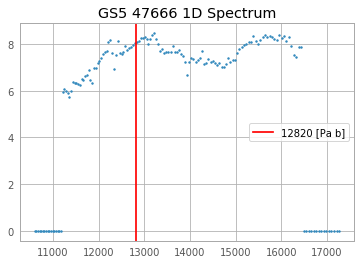

In [89]:
grism1D47666 = fits.open('GS5_47666.1D.fits')
#Plot flux vs wavelength
y1d47666 = grism1D47666[1].data['flux'] 
x1d47666 = grism1D47666[1].data['wave']

plt.scatter(x1d47666, y1d47666, s = 2)
plt.title('GS5 47666 1D Spectrum')
plt.axvline(x=12820, color='r', label='12820 [Pa b]')
plt.legend()
#plt.axis([12000 , 16000 , 2.8e-17 , 3.6e-17])
plt.show()

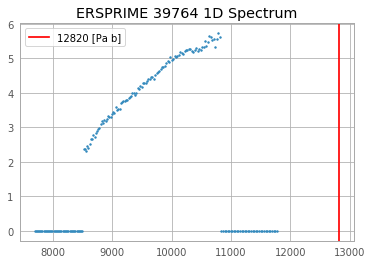

In [107]:
grism1D39764 = fits.open('ERSPRIME_39764.1D.fits')

y1d39764 = grism1D39764[1].data['flux'] 
x1d39764 = grism1D39764[1].data['wave']

plt.scatter(x1d39764, y1d39764, s = 2)
plt.title('ERSPRIME 39764 1D Spectrum')
plt.axvline(x=12820, color='r', label='12820 [Pa b]')
plt.legend()
#plt.axis([12000 , 16000 , 2.8e-17 , 3.6e-17])
plt.show()

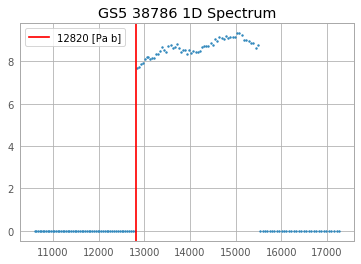

In [108]:
grism1D38786 = fits.open('GS5_38786.1D.fits')

y1d38786 = grism1D38786[1].data['flux'] 
x1d38786 = grism1D38786[1].data['wave']

plt.scatter(x1d38786, y1d38786, s = 2)
plt.title('GS5 38786 1D Spectrum')
plt.axvline(x=12820, color='r', label='12820 [Pa b]')
plt.legend()
#plt.axis([12000 , 16000 , 2.8e-17 , 3.6e-17])
plt.show()

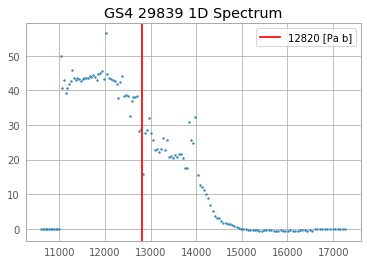

In [109]:
grism1D29839 = fits.open('GS4_29839.1D.fits')

y1d29839 = grism1D29839[1].data['flux'] 
x1d29839 = grism1D29839[1].data['wave']

plt.scatter(x1d29839, y1d29839, s = 2)
plt.title('GS4 29839 1D Spectrum')
plt.axvline(x=12820, color='r', label='12820 [Pa b]')
plt.legend()
#plt.axis([12000 , 16000 , 2.8e-17 , 3.6e-17])
plt.show()

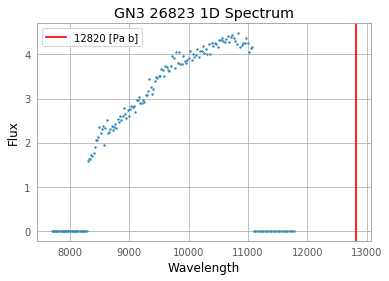

In [110]:
#Plot flux vs wavelength
grism1D26823 = fits.open('GN3_26823.1D.fits')

x1d26823 = grism1D26823[1].data['wave']
y1d26823 = grism1D26823[1].data['flux'] 

plt.scatter(x1d26823, y1d26823, s = 2)
plt.title('GN3 26823 1D Spectrum')
plt.axvline(x=12820, color='r', label='12820 [Pa b]')
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Flux")
#plt.axis([12000 , 16000 , 2.8e-17 , 3.6e-17])
plt.show()

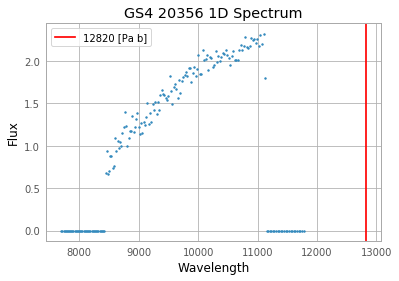

In [103]:
#Plot flux vs wavelength
grism1D20356 = fits.open('GS4_20356.1D.fits')

x1d20356 = grism1D20356[1].data['wave']
y1d20356 = grism1D20356[1].data['flux'] 
#print(grism1D37717[1].data['flat'])

plt.scatter(x1d20356, y1d20356, s = 2)
plt.title('GS4 20356 1D Spectrum')
plt.axvline(x=12820, color='r', label='12820 [Pa b]')
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Flux")
#plt.axis([12000 , 16000 , 2.8e-17 , 3.6e-17])
plt.show()

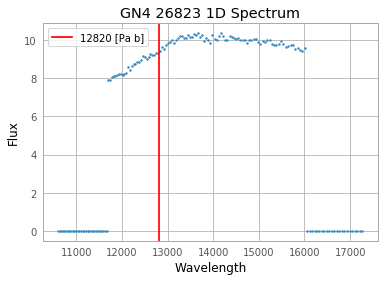

In [104]:
#Plot flux vs wavelength
grism1D26823 = fits.open('GN4_26823.1D.fits')

x1d26823 = grism1D26823[1].data['wave']
y1d26823 = grism1D26823[1].data['flux'] 
#print(grism1D37717[1].data['flat'])

plt.scatter(x1d26823, y1d26823, s = 2)
plt.title('GN4 26823 1D Spectrum')
plt.axvline(x=12820, color='r', label='12820 [Pa b]')
plt.legend()
plt.xlabel("Wavelength")
plt.ylabel("Flux")
#plt.axis([12000 , 16000 , 2.8e-17 , 3.6e-17])
plt.show()

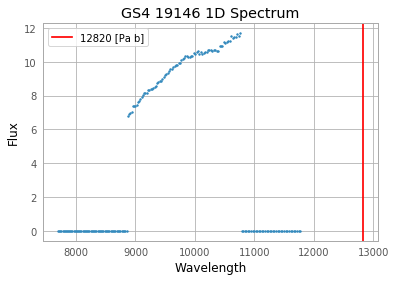

In [106]:
#Plot flux vs wavelength
grism1D19146 = fits.open('GS4_19146.1D.fits')

x1d19146 = grism1D19146[1].data['wave']
y1d19146 = grism1D19146[1].data['flux'] 

plt.scatter(x1d19146, y1d19146, s = 2)
plt.title('GS4 19146 1D Spectrum')
plt.axvline(x=12820, color='r', label='12820 [Pa b]')
plt.xlabel("Wavelength")
plt.ylabel("Flux")
#plt.axis([12000 , 16000 , 2.8e-17 , 3.6e-17])
plt.legend()
plt.show()